In [1]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

/Users/ashleyxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

## 1. Split the dataset into 70% training set and 30% test set.

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [4]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354,)
Shape of y_test (152,)


In [5]:
print(X_train)

[[  0.54011  20.        3.97    ...  13.      392.8       9.59   ]
 [  0.7258    0.        8.14    ...  21.      390.95     11.28   ]
 [  1.13081   0.        8.14    ...  21.      360.17     22.6    ]
 ...
 [  8.05579   0.       18.1     ...  20.2     352.58     18.14   ]
 [  0.40202   0.        9.9     ...  18.4     395.21     10.36   ]
 [  0.59005   0.       21.89    ...  21.2     385.76     11.12   ]]


In [6]:
print(y_test)

[21.4 19.1 25.  10.5 20.  28.1 32.4 13.6  9.5 35.2 14.5 14.  16.  22.7
 35.1 21.  28.4  8.8  5.  24.4 22.9 13.4 30.1 23.9 50.  23.  46.  24.7
 22.6 20.8 29.4 30.8 17.4 27.5 13.4 20.1 19.9 20.6 15.  20.1 18.7 20.2
 13.4 16.8  7.5 23.8 21.5 24.3 32.7 15.2 22.5 16.7 32.  18.3 17.1 11.7
 34.9 23.7 13.1 29.8 21.7 16.8 23.2 16.2 24.6 11.5 19.6 50.  23.9 15.
 19.3 22.6 20.  20.3 50.  22.8 16.1 29.  23.9 21.6 22.3 20.6 32.9 19.5
 10.4 22.  26.4 23.1 23.8 19.2 16.2 20.4 18.1 17.6 29.1 19.4 24.5 25.1
 14.4 29.9 15.6 21.4 18.3 16.1  8.3 14.5 15.1 33.4 48.3 20.5 17.2 22.3
 19.9 20.1 36.2 39.8 25.  38.7 22.9 23.4 21.5 13.1 22.  18.4 22.8 27.1
 19.4 18.8 27.5 50.   8.1 34.9 16.4 13.5 17.8 45.4 17.5 19.1 22.8 23.2
 33.2 29.  18.5 19.3 12.5 13.8 15.6 23.9 28.2 23.6 24.7 14.1]


## 2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data

In [7]:
# convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)
y_test_transformed = lab.fit_transform(y_test)

In [8]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train_transformed)


## 3. Report the tree depth, number of leaves, feature importance, train score, and test score of the tree. Let the tree depth be Td.

In [9]:
Td = clf.get_depth()
leaves = clf.get_n_leaves()
feature_importance = clf.feature_importances_
train_score = clf.score(X_train, y_train_transformed)
test_score = clf.score(X_test, y_test_transformed)

print("tree depth: ", Td)
print("Number of leaves: ",leaves)
print("feature importance: ",feature_importance)
print("train score: ",train_score)
print("test score: ",test_score)

tree depth:  23
Number of leaves:  300
feature importance:  [0.12226168 0.02338521 0.05696511 0.00569379 0.07731762 0.13818823
 0.10759613 0.08120735 0.03900183 0.04378038 0.04498326 0.10818011
 0.1514393 ]
train score:  1.0
test score:  0.019736842105263157


## 4. Show the visual output of the decision tree.

In [10]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=boston.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)

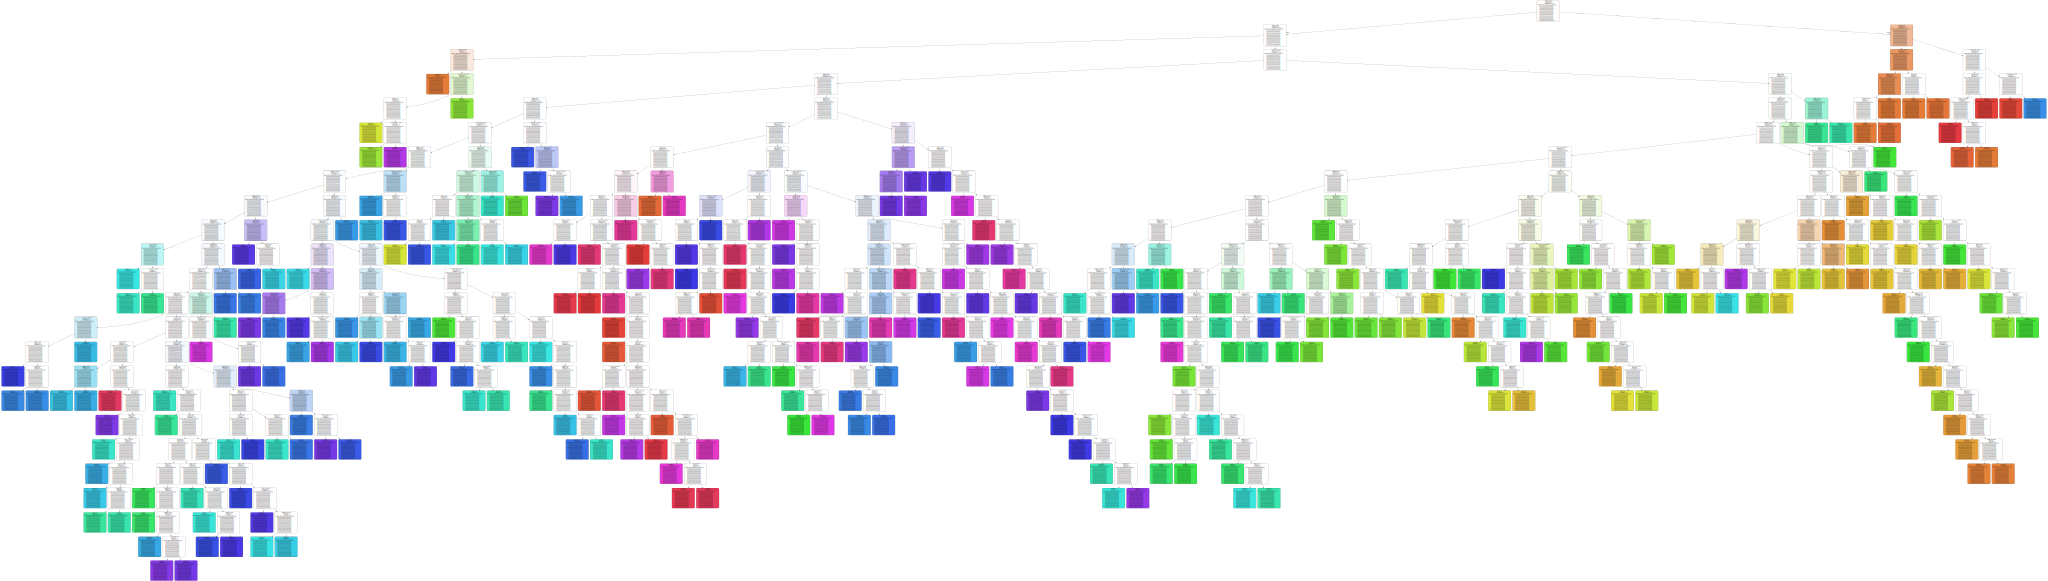

In [11]:
graph

## 5. Next, Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the tree.

In [12]:
def generate_decision_trees(Td):
    clf = DecisionTreeClassifier(random_state=0, max_depth=Td)
    return clf
    

## 6.  For each of the (Td-1) trees report, tree depth, number of leaves, feature importance, train score, and test score of the tree.

In [13]:
def generate_report(n):
    for i in range(1, n):
        clf = generate_decision_trees(i)
        clf = clf.fit(X_train,y_train_transformed)
        Td = clf.get_depth()
        leaves = clf.get_n_leaves()
        feature_importance = clf.feature_importances_
        train_score = clf.score(X_train, y_train_transformed)
        test_score = clf.score(X_test, y_test_transformed)
        print("======================")
        print("tree depth: ", Td)
        print("Number of leaves: ",leaves)
        print("feature importance: ",feature_importance)
        print("train score: ",train_score)
        print("test score: ",test_score)
        

In [14]:
generate_report(Td)

tree depth:  1
Number of leaves:  2
feature importance:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
train score:  0.0423728813559322
test score:  0.006578947368421052
tree depth:  2
Number of leaves:  4
feature importance:  [0.         0.         0.         0.         0.         0.56058587
 0.         0.21292597 0.22648815 0.         0.         0.
 0.        ]
train score:  0.05084745762711865
test score:  0.006578947368421052
tree depth:  3
Number of leaves:  8
feature importance:  [0.         0.         0.         0.         0.16032157 0.39063399
 0.         0.13188129 0.14028138 0.         0.         0.
 0.17688178]
train score:  0.07062146892655367
test score:  0.006578947368421052
tree depth:  4
Number of leaves:  14
feature importance:  [0.         0.         0.         0.         0.10657691 0.36098512
 0.08881409 0.20613922 0.0932548  0.         0.         0.
 0.14422986]
train score:  0.09322033898305085
test score:  0.013157894736842105
tree depth:  5
Number of leaves:  21
featu

## 7. Show the visual output of the decision tree with highest test score from the (Td-1) trees.

From the report above, the decision tree with highest test score is when Td = 12, the test score is 0.0329

In [15]:
clf = DecisionTreeClassifier(random_state=0, max_depth=12)
clf = clf.fit(X_train,y_train_transformed)

In [16]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=boston.feature_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)

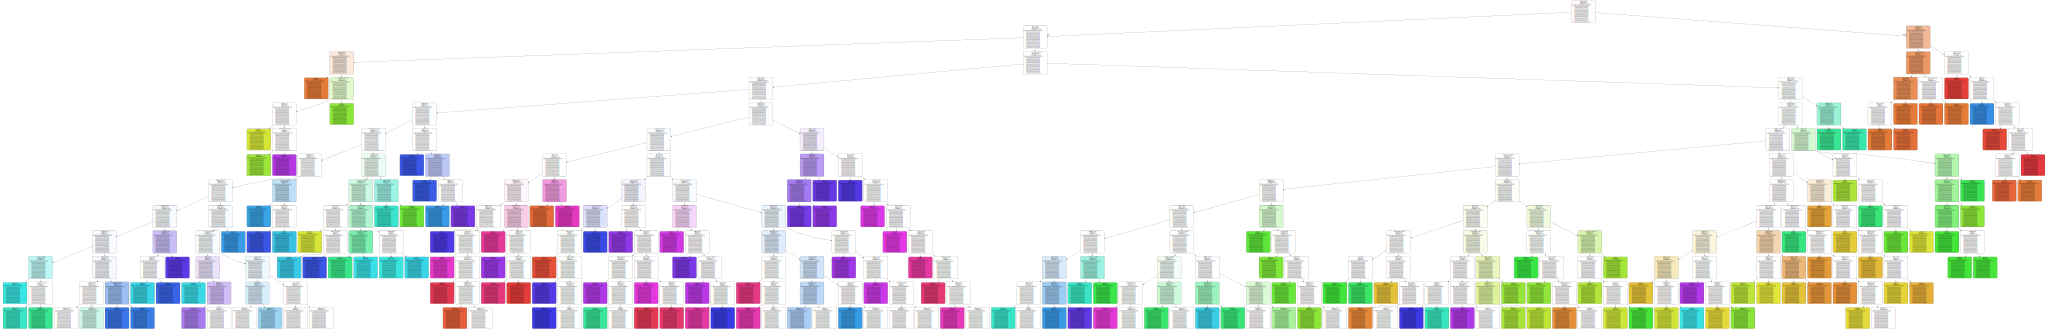

In [17]:
graph